In [1]:
import pandas as pd
from extract import Count, SocialETL, SocialDB
import networkx as nx
#import networkx.algorithms as nx
import pandas as pd
import matplotlib.pyplot as plt
from networkx.utils import np_random_state
from networkx.algorithms import community
import seaborn as sns
import numpy as np
import math

In [3]:
m = SocialDB(placeholder=True)

In [4]:
m.df

,class
id,
702933,pax
696257,proukr
782418,prorus
952054,prorus
494843,nocare
...,...
275576,proukr
542537,proukr
447098,nocare


In [5]:
m.edges

[{'id': 395075, 'from': 272846, 'to': 659524},
 {'id': 901099, 'from': 628862, 'to': 648664},
 {'id': 976569, 'from': 896970, 'to': 828945},
 {'id': 944689, 'from': 476307, 'to': 523723},
 {'id': 327113, 'from': 869792, 'to': 776313},
 {'id': 287440, 'from': 103072, 'to': 407910},
 {'id': 235201, 'from': 312480, 'to': 313650},
 {'id': 998693, 'from': 856486, 'to': 696257},
 {'id': 266803, 'from': 495195, 'to': 966650},
 {'id': 344116, 'from': 612852, 'to': 103841},
 {'id': 826887, 'from': 754270, 'to': 580623},
 {'id': 355031, 'from': 659524, 'to': 724877},
 {'id': 876333, 'from': 648664, 'to': 258357},
 {'id': 225424, 'from': 986284, 'to': 776313},
 {'id': 350218, 'from': 381665, 'to': 211068},
 {'id': 431171, 'from': 876059, 'to': 726069},
 {'id': 381836, 'from': 670757, 'to': 782418},
 {'id': 913785, 'from': 963907, 'to': 534633},
 {'id': 947823, 'from': 523723, 'to': 622278},
 {'id': 545088, 'from': 523723, 'to': 258357},
 {'id': 753698, 'from': 782418, 'to': 407910},
 {'id': 40839

In [7]:
g= list(m.df.index)
G = nx.Graph()
G.add_nodes_from(g, stand=m.df["class"])
G.nodes[648664]["stand"]

id
702933       pax
696257    proukr
782418    prorus
952054    prorus
494843    nocare
           ...  
275576    proukr
542537    proukr
447098    nocare
108666    proukr
648664       pax
Name: class, Length: 100, dtype: category
Categories (4, object): ['nocare', 'pax', 'prorus', 'proukr']

In [8]:
edges = [(x["from"], x["to"]) for x in m.edges]
print(edges)

[(272846, 659524), (628862, 648664), (896970, 828945), (476307, 523723), (869792, 776313), (103072, 407910), (312480, 313650), (856486, 696257), (495195, 966650), (612852, 103841), (754270, 580623), (659524, 724877), (648664, 258357), (986284, 776313), (381665, 211068), (876059, 726069), (670757, 782418), (963907, 534633), (523723, 622278), (523723, 258357), (782418, 407910), (867040, 529763), (770450, 238091), (769117, 373262), (967769, 776313), (275576, 986284), (604151, 702933), (769117, 163359), (769117, 871096), (986284, 357501), (366842, 211068), (373262, 269094), (233505, 586019), (163359, 536241), (494843, 782418), (896970, 863826), (896970, 665702), (888687, 205662), (233538, 604151), (669223, 782418), (616848, 769117), (612852, 219516), (828945, 381665), (997559, 219516), (888687, 556666), (373262, 226985), (828945, 770450), (226985, 967769), (669223, 312480), (233505, 348849), (665702, 312480), (103841, 724877), (665702, 982530), (526712, 556666), (211068, 495195), (682037, 

In [9]:
G.add_edges_from(edges)

In [10]:
G.number_of_edges()

293

In [12]:
G.number_of_nodes()


100

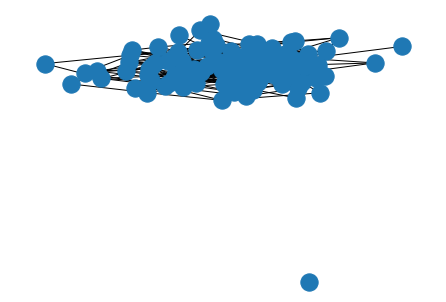

In [13]:
nx.draw(G)

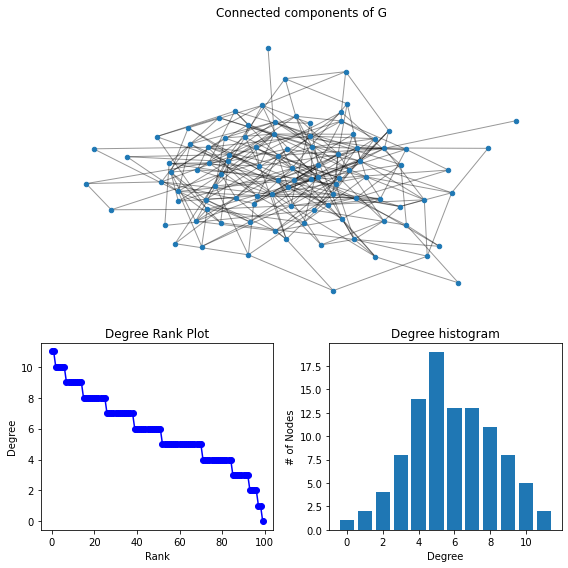

In [14]:
degree_sequence_G = sorted((d for n, d in G.degree()), reverse=True)
dmax_G = max(degree_sequence_G)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc_G = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos_G = nx.spring_layout(Gcc_G, seed=10396953)
nx.draw_networkx_nodes(Gcc_G, pos_G, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc_G, pos_G, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence_G, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence_G, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [15]:
nx.average_neighbor_degree(G)

{702933: 7.25,
 696257: 4.875,
 782418: 6.444444444444445,
 952054: 7.4,
 494843: 6.5,
 523723: 6.3,
 536241: 6.0,
 526712: 6.375,
 264996: 5.0,
 828945: 6.0,
 826247: 7.8,
 238091: 6.0,
 496059: 9.2,
 534633: 6.666666666666667,
 888687: 6.857142857142857,
 163359: 6.5,
 207132: 7.666666666666667,
 233505: 5.25,
 313650: 8.25,
 258357: 7.0,
 665702: 5.666666666666667,
 856486: 8.0,
 966650: 7.8,
 159734: 6.4,
 103072: 7.9,
 226985: 6.666666666666667,
 386273: 7.2,
 997559: 6.625,
 272846: 4.8,
 348849: 6.0,
 876186: 7.0,
 103841: 7.5,
 682676: 4.6,
 896970: 6.0,
 754270: 8.5,
 476307: 6.0,
 726069: 6.0,
 925963: 9.333333333333334,
 887710: 7.5,
 233538: 5.75,
 616848: 8.75,
 452736: 7.166666666666667,
 154351: 6.777777777777778,
 628862: 5.714285714285714,
 556666: 7.0,
 776313: 7.222222222222222,
 869792: 6.555555555555555,
 604151: 7.166666666666667,
 682037: 7.375,
 318031: 8.0,
 982530: 8.0,
 963907: 7.571428571428571,
 938428: 6.166666666666667,
 622278: 6.142857142857143,
 586019

In [16]:
nx.is_connected(G)

False

### Create an Erdons Renyi Random Graph



In [17]:
er = nx.erdos_renyi_graph(n = G.number_of_nodes(), p= 0.06, seed = 21)

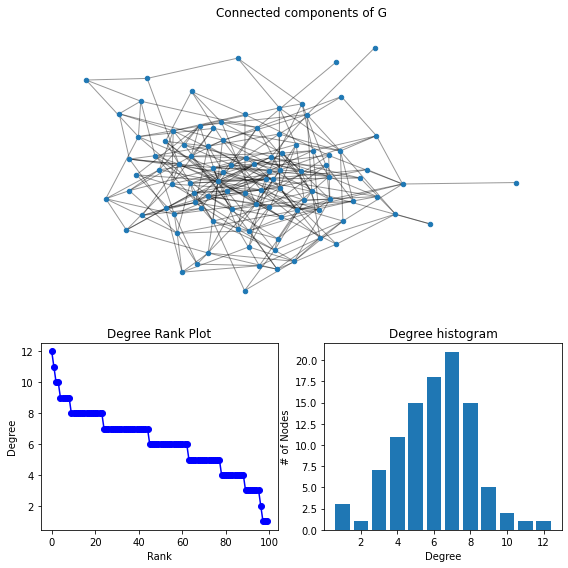

In [18]:
degree_sequence_e = sorted((d for n, d in er.degree()), reverse=True)
dmax_er = max(degree_sequence_e)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc_e = er.subgraph(sorted(nx.connected_components(er), key=len, reverse=True)[0])
pos_e = nx.spring_layout(Gcc_e, seed=21)
nx.draw_networkx_nodes(Gcc_e, pos_e, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc_e, pos_e, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence_e, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence_e, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [19]:
nx.average_neighbor_degree(er)

{0: 7.0,
 1: 6.5,
 2: 6.857142857142857,
 3: 6.857142857142857,
 4: 7.0,
 5: 6.333333333333333,
 6: 8.25,
 7: 6.75,
 8: 5.8,
 9: 7.0,
 10: 8.2,
 11: 7.0,
 12: 6.0,
 13: 6.0,
 14: 6.375,
 15: 6.833333333333333,
 16: 6.5,
 17: 6.25,
 18: 7.142857142857143,
 19: 7.0,
 20: 6.166666666666667,
 21: 6.8,
 22: 7.0,
 23: 6.333333333333333,
 24: 6.5,
 25: 6.714285714285714,
 26: 6.857142857142857,
 27: 6.75,
 28: 7.25,
 29: 6.75,
 30: 8.0,
 31: 6.9,
 32: 9.0,
 33: 6.0,
 34: 7.666666666666667,
 35: 6.75,
 36: 7.666666666666667,
 37: 6.2,
 38: 5.375,
 39: 6.5,
 40: 5.2,
 41: 7.0,
 42: 6.875,
 43: 4.666666666666667,
 44: 6.5,
 45: 5.428571428571429,
 46: 6.6,
 47: 6.666666666666667,
 48: 8.125,
 49: 7.375,
 50: 6.0,
 51: 7.166666666666667,
 52: 7.333333333333333,
 53: 8.0,
 54: 6.25,
 55: 7.166666666666667,
 56: 7.6,
 57: 7.333333333333333,
 58: 7.0,
 59: 8.2,
 60: 7.6,
 61: 6.5,
 62: 7.0,
 63: 7.125,
 64: 6.571428571428571,
 65: 6.888888888888889,
 66: 6.6,
 67: 4.666666666666667,
 68: 7.6,
 69: 6

### Create an Barabasi Albert Graph

In [20]:
ba = nx.barabasi_albert_graph(n = G.number_of_nodes(), m =3 , seed = 21)

In [21]:
ba.number_of_edges()

291

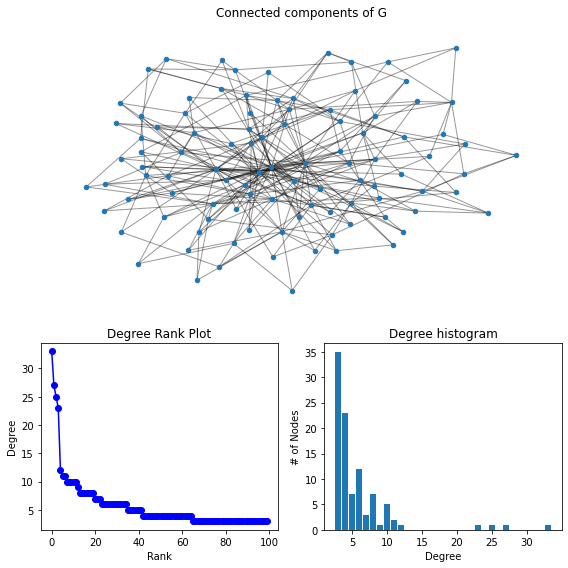

In [22]:
degree_sequence_b = sorted((d for n, d in ba.degree()), reverse=True)
dmax = max(degree_sequence_b)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc_b = ba.subgraph(sorted(nx.connected_components(ba), key=len, reverse=True)[0])
pos_b = nx.spring_layout(Gcc_b, seed=10396953)
nx.draw_networkx_nodes(Gcc_b, pos_b, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc_b, pos_b, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence_b, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence_b, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [23]:
nx.average_neighbor_degree(er)

{0: 7.0,
 1: 6.5,
 2: 6.857142857142857,
 3: 6.857142857142857,
 4: 7.0,
 5: 6.333333333333333,
 6: 8.25,
 7: 6.75,
 8: 5.8,
 9: 7.0,
 10: 8.2,
 11: 7.0,
 12: 6.0,
 13: 6.0,
 14: 6.375,
 15: 6.833333333333333,
 16: 6.5,
 17: 6.25,
 18: 7.142857142857143,
 19: 7.0,
 20: 6.166666666666667,
 21: 6.8,
 22: 7.0,
 23: 6.333333333333333,
 24: 6.5,
 25: 6.714285714285714,
 26: 6.857142857142857,
 27: 6.75,
 28: 7.25,
 29: 6.75,
 30: 8.0,
 31: 6.9,
 32: 9.0,
 33: 6.0,
 34: 7.666666666666667,
 35: 6.75,
 36: 7.666666666666667,
 37: 6.2,
 38: 5.375,
 39: 6.5,
 40: 5.2,
 41: 7.0,
 42: 6.875,
 43: 4.666666666666667,
 44: 6.5,
 45: 5.428571428571429,
 46: 6.6,
 47: 6.666666666666667,
 48: 8.125,
 49: 7.375,
 50: 6.0,
 51: 7.166666666666667,
 52: 7.333333333333333,
 53: 8.0,
 54: 6.25,
 55: 7.166666666666667,
 56: 7.6,
 57: 7.333333333333333,
 58: 7.0,
 59: 8.2,
 60: 7.6,
 61: 6.5,
 62: 7.0,
 63: 7.125,
 64: 6.571428571428571,
 65: 6.888888888888889,
 66: 6.6,
 67: 4.666666666666667,
 68: 7.6,
 69: 6

### Watts-Strogatz - small world

In [24]:
Ws = nx.watts_strogatz_graph(G.number_of_nodes(), k=7, p=0.2, seed = 42)

In [25]:
Ws.number_of_edges()

300

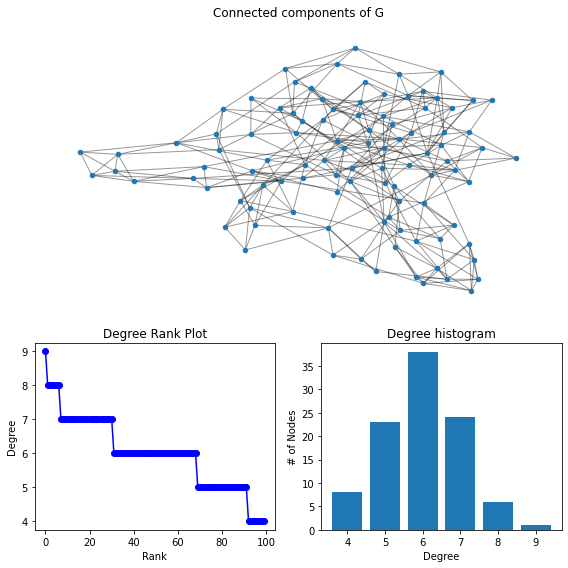

In [26]:
degree_sequence_w = sorted((d for n, d in Ws.degree()), reverse=True)
dmax_w = max(degree_sequence_w)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc_w = Ws.subgraph(sorted(nx.connected_components(Ws), key=len, reverse=True)[0])
pos_w = nx.spring_layout(Gcc_w, seed=10396953)
nx.draw_networkx_nodes(Gcc_w, pos_w, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc_w, pos_w, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence_w, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence_w, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [27]:
nx.average_neighbor_degree(Ws)

{0: 6.25,
 1: 6.666666666666667,
 2: 6.2,
 3: 6.333333333333333,
 4: 5.333333333333333,
 5: 6.2,
 6: 6.666666666666667,
 7: 6.0,
 8: 6.0,
 9: 5.833333333333333,
 10: 6.166666666666667,
 11: 6.333333333333333,
 12: 6.571428571428571,
 13: 6.5,
 14: 6.428571428571429,
 15: 7.333333333333333,
 16: 5.714285714285714,
 17: 6.8,
 18: 6.333333333333333,
 19: 6.5,
 20: 6.0,
 21: 6.2,
 22: 6.285714285714286,
 23: 6.0,
 24: 6.142857142857143,
 25: 6.333333333333333,
 26: 6.285714285714286,
 27: 6.6,
 28: 6.5,
 29: 6.285714285714286,
 30: 5.857142857142857,
 31: 6.333333333333333,
 32: 6.666666666666667,
 33: 6.5,
 34: 6.333333333333333,
 35: 6.0,
 36: 5.857142857142857,
 37: 6.0,
 38: 6.0,
 39: 6.2,
 40: 5.333333333333333,
 41: 6.166666666666667,
 42: 5.857142857142857,
 43: 6.0,
 44: 6.75,
 45: 6.8,
 46: 5.375,
 47: 6.25,
 48: 5.714285714285714,
 49: 6.4,
 50: 6.0,
 51: 6.285714285714286,
 52: 6.166666666666667,
 53: 6.5,
 54: 6.125,
 55: 6.666666666666667,
 56: 6.4,
 57: 6.2,
 58: 6.125,
 59: 

### Configuration model

In [28]:
sequence = [i[1] for i in ba.degree()]

cm = nx.configuration_model(sequence)

In [29]:
cm.number_of_edges()

291

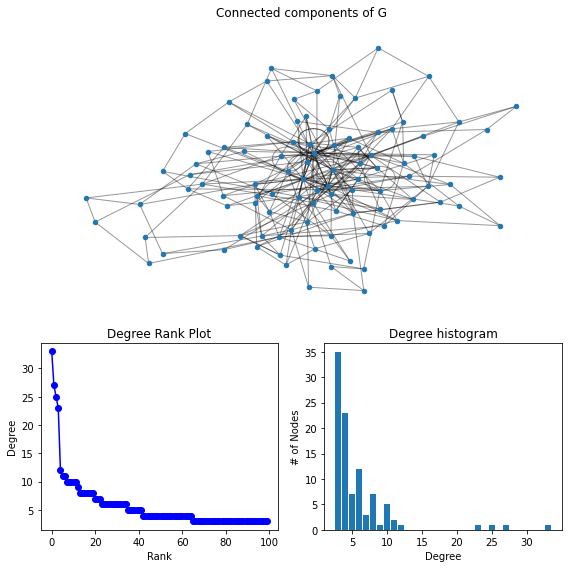

In [30]:
degree_sequence_c = sorted((d for n, d in cm.degree()), reverse=True)
dmax_w = max(degree_sequence_c)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc_c = cm.subgraph(sorted(nx.connected_components(cm), key=len, reverse=True)[0])
pos_c = nx.spring_layout(Gcc_c, seed=10396953)
nx.draw_networkx_nodes(Gcc_c, pos_c, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc_c, pos_c, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence_c, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence_c, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

In [31]:
nx.average_neighbor_degree(cm)

{0: 8.76,
 1: 11.5,
 2: 6.9,
 3: 10.636363636363637,
 4: 6.818181818181818,
 5: 7.222222222222222,
 6: 10.5,
 7: 5.956521739130435,
 8: 10.0,
 9: 10.3,
 10: 7.5,
 11: 8.142857142857142,
 12: 6.4,
 13: 12.5,
 14: 8.916666666666666,
 15: 9.666666666666666,
 16: 10.833333333333334,
 17: 12.5,
 18: 9.454545454545455,
 19: 7.75,
 20: 4.333333333333333,
 21: 6.25,
 22: 11.0,
 23: 10.125,
 24: 10.5,
 25: 12.285714285714286,
 26: 7.833333333333333,
 27: 10.6,
 28: 5.571428571428571,
 29: 8.25,
 30: 10.6,
 31: 11.333333333333334,
 32: 10.8,
 33: 4.666666666666667,
 34: 5.0,
 35: 5.2,
 36: 7.375,
 37: 6.833333333333333,
 38: 6.4,
 39: 16.0,
 40: 11.333333333333334,
 41: 4.333333333333333,
 42: 15.75,
 43: 9.777777777777779,
 44: 14.25,
 45: 15.333333333333334,
 46: 5.0,
 47: 10.0,
 48: 8.6,
 49: 5.0,
 50: 13.666666666666666,
 51: 3.6666666666666665,
 52: 18.166666666666668,
 53: 12.0,
 54: 5.666666666666667,
 55: 16.5,
 56: 5.666666666666667,
 57: 12.0,
 58: 5.666666666666667,
 59: 10.6666666666

# Connected components analysis



In [32]:
from networkx.drawing.nx_agraph import graphviz_layout

In [33]:
cc_g= list(nx.connected_components(G))

In [34]:
cc_er =list(nx.connected_components(er))

In [35]:
cc_ba= list(nx.connected_components(ba))

In [36]:
cc_Ws= list(nx.connected_components(Ws))

In [37]:
cc_cm= list(nx.connected_components(cm))

# Clustering Coefficient, Density analysis

In [38]:
print("Average clustering (G) :", nx.average_clustering(G))
print("Density (G) :", nx.density(G))

Average clustering (G) : 0.05126479076479076
Density (G) : 0.05919191919191919


In [39]:
print("Average clustering (er) :", nx.average_clustering(er))
print("Density (er) :", nx.density(er))

Average clustering (er) : 0.06254761904761903
Density (er) : 0.061414141414141414


In [40]:
print("Average clustering (ba) :", nx.average_clustering(ba))
print("Density (ba) :", nx.density(ba))

Average clustering (ba) : 0.1364782601858688
Density (ba) : 0.058787878787878785


In [41]:
print("Average clustering (Ws) :", nx.average_clustering(Ws))
print("Density (Ws) :", nx.density(Ws))

Average clustering (Ws) : 0.30903968253968234
Density (Ws) : 0.06060606060606061


In [42]:
print("Density (cm) :", nx.density(cm))

Density (cm) : 0.058787878787878785


# Path analysis

In [43]:

print("Number of Connected Components (G): ", len(cc_g))

print("Diameter (G) :", nx.diameter(G.subgraph(cc_g[0])))
print("Average shortest path (G):", nx.average_shortest_path_length(G.subgraph(cc_g[0])))

Number of Connected Components (G):  2
Diameter (G) : 5
Average shortest path (G): 2.748711605854463


In [44]:
print("Number of Connected Components (er): ", len(cc_er))

print("Diameter (er) :", nx.diameter(er.subgraph(cc_er[0])))
print("Average shortest path (er):", nx.average_shortest_path_length(er.subgraph(cc_er[0])))

Number of Connected Components (er):  1
Diameter (er) : 6
Average shortest path (er): 2.7555555555555555


In [45]:
print("Number of Connected Components (ba): ", len(cc_ba))

print("Diameter (ba) :", nx.diameter(ba.subgraph(cc_ba[0])))
print("Average shortest path (ba):", nx.average_shortest_path_length(ba.subgraph(cc_ba[0])))

Number of Connected Components (ba):  1
Diameter (ba) : 5
Average shortest path (ba): 2.5824242424242425


In [46]:
print("Number of Connected Components (Ws): ", len(cc_Ws))

print("Diameter (Ws) :", nx.diameter(ba.subgraph(cc_Ws[0])))
print("Average shortest path (Ws):", nx.average_shortest_path_length(Ws.subgraph(cc_Ws[0])))

Number of Connected Components (Ws):  1
Diameter (Ws) : 5
Average shortest path (Ws): 3.096363636363636


In [47]:
print("Number of Connected Components (cm): ", len(cc_cm))

print("Diameter (cm) :", nx.diameter(cm.subgraph(cc_cm[0])))
print("Average shortest path (cm):", nx.average_shortest_path_length(cm.subgraph(cc_cm[0])))

Number of Connected Components (cm):  1
Diameter (cm) : 5
Average shortest path (cm): 2.761010101010101
